In [1]:
from functions import *
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import spearmanr, pearsonr
from optparse import OptionParser
import matplotlib
matplotlib.use('Agg')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping
from collections import OrderedDict

%matplotlib inline

/nfs/scistore08/kondrgrp/eputints/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
def disectSeq(sq):
    aaList = []
    counter = 0
    for a in sq:
        aaList.append(str(counter)+a)
        counter+=1
    return ':'.join(aaList)

In [3]:
ref_weights=pd.DataFrame.from_csv('../../../Lucas/Revisions/Simulations_NN_Detects_Linear_Nonmonotonic_fitness_functions__AAstates.tab', sep='\t')
simulated_data=pd.DataFrame.from_csv('../../../Lucas/Revisions/Simulations_NN_Detects_Linear_Nonmonotonic_fitness_functions.tab', sep='\t')

/usr/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if __name__ == '__main__':
/usr/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  from ipykernel import kernelapp as app


In [4]:
genotype_list = [disectSeq(sq) for sq in simulated_data.index]

In [5]:
unique_mutations = set(':'.join(genotype_list).split(':'))
unique_mutations = sorted(list(unique_mutations))

In [6]:
def make_feature_matrix(genotype_list,unique_mutations):
    feature_matrix = np.zeros((len(genotype_list), len(unique_mutations)))
    
    for i in range(len(genotype_list)):
        if genotype_list[i] != '':
            feature_matrix[i] = makeBinary(unique_mutations, genotype_list[i])[0]
            
    return feature_matrix

In [8]:
data = make_feature_matrix(genotype_list,unique_mutations)

In [16]:
function='fitness_sin2'
labels = np.array(simulated_data[function])

In [17]:
f='sigmoid'

In [25]:
chunk='S5'
data, labels, unique_mutations, aa_seq, mutlist = read_data_all_positions(chunk)

min_max_scaler = MinMaxScaler()
n_iter = 100

scaledLabels = min_max_scaler.fit_transform(labels.reshape(-1,1))

x_train, x_valid, y_train, y_valid = train_test_split(data, scaledLabels, test_size = 0.01)

model = Sequential()

model.add(Dense(1,input_dim=data.shape[1],kernel_initializer='glorot_normal',activation=f))
model.add(Dense(50,activation=f))
model.add(Dense(100,activation=f))
model.add(Dense(1,activation=f))

opt = optimizers.RMSprop(lr=0.01)

early_stopping_monitor=EarlyStopping(patience=100)

model.compile(optimizer=opt,
              loss='mean_squared_error')

hist = model.fit(x_train, y_train, validation_data=[x_valid, y_valid], 
                        epochs=n_iter, batch_size=500, shuffle=True, callbacks=[early_stopping_monitor],verbose=1)

proba = model.predict_proba(data, batch_size=500)

weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

true = labels
predicted = min_max_scaler.inverse_transform(proba)
predicted = predicted.flatten()
fitness_potential = data.dot(weights) + biases

Train on 50610 samples, validate on 512 samples
Epoch 1/100
50610/50610 [==============================] - 0s - loss: 0.0194 - val_loss: 0.0106
Epoch 2/100
50610/50610 [==============================] - 0s - loss: 0.0094 - val_loss: 0.0106
Epoch 3/100
50610/50610 [==============================] - 0s - loss: 0.0076 - val_loss: 0.0093
Epoch 4/100
50610/50610 [==============================] - 0s - loss: 0.0057 - val_loss: 0.0051
Epoch 5/100
50610/50610 [==============================] - 0s - loss: 0.0049 - val_loss: 0.0059
Epoch 6/100
50610/50610 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0059
Epoch 7/100
50610/50610 [==============================] - 0s - loss: 0.0047 - val_loss: 0.0053
Epoch 8/100
50610/50610 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 9/100
50610/50610 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0052
Epoch 10/100
50610/50610 [==============================] - 0s - loss: 0.0047 - val_loss

50610/50610 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0053
Epoch 86/100
50610/50610 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0049
Epoch 87/100
50610/50610 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0056
Epoch 88/100
50610/50610 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0048
Epoch 89/100
50610/50610 [==============================] - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 90/100
50610/50610 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0048
Epoch 91/100
50610/50610 [==============================] - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 92/100
50610/50610 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 93/100
50610/50610 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 94/100
50610/50610 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 95/100
50610/50610 [=================

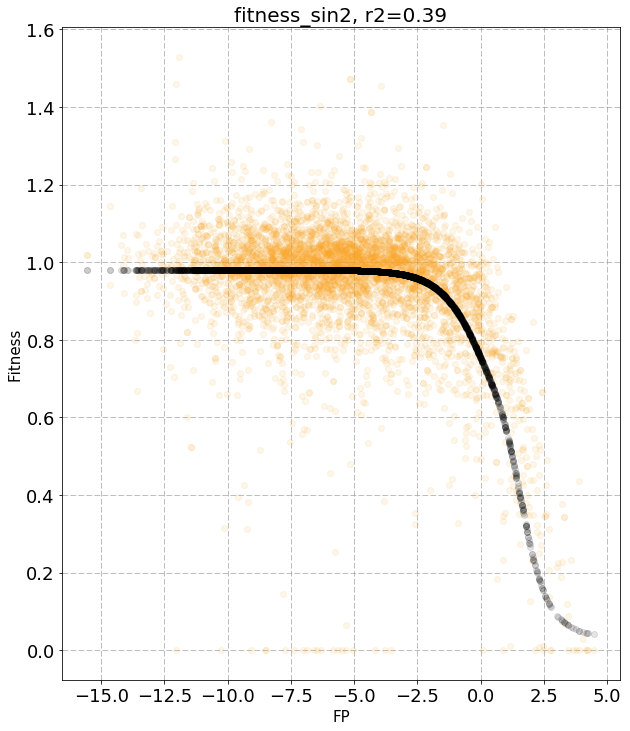

In [26]:
inds = np.random.choice([x for x in range(len(labels))],5000)

plt.figure(figsize=[10,12])
r=r2_score(labels,predicted)
X = fitness_potential[inds]
Y = true[inds]
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(X, Y, 'o', alpha = 0.1, color='#F9A828')
plt.plot(X, predicted[inds], 'o', c='k', alpha = 0.1)
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
plt.title('%s, r2=%.2f' % (function, r),fontsize=20)
plt.xlabel('FP',fontsize=15)
plt.ylabel('Fitness',fontsize=15)
# plt.savefig('../rebuttal/'+function+'_predicted_model.pdf')

In [20]:
predicted_weights_per_aa = OrderedDict()
for a in ref_weights.index:
    predicted_weights_per_aa[a] = []
    for i,aa in enumerate(unique_mutations):
        if a in aa:
            predicted_weights_per_aa[a].extend(weights[i])

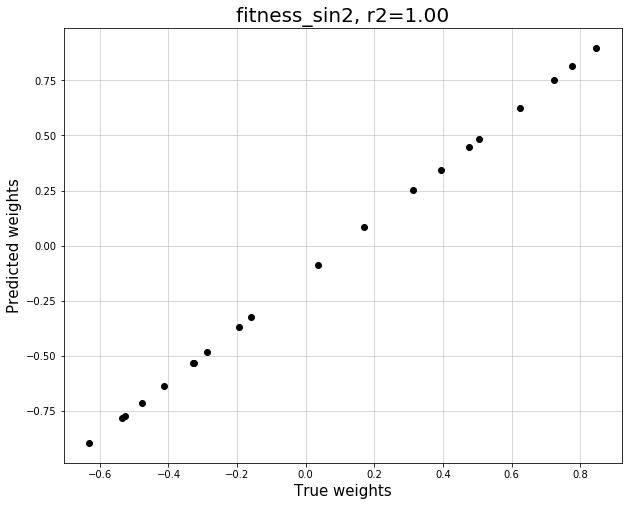

In [21]:
plt.figure(figsize=[10,8])
plt.plot(ref_weights, [np.median(predicted_weights_per_aa[x]) for x in predicted_weights_per_aa], 'ok')
plt.grid(lw=0.5)
plt.xlabel('True weights',fontsize=15)
plt.ylabel('Predicted weights',fontsize=15)
r2=pearsonr(ref_weights.FP, [np.median(predicted_weights_per_aa[x]) for x in predicted_weights_per_aa])[0]**2
plt.title('%s, r2=%.2f' % (function, r2),fontsize=20)
plt.savefig('../rebuttal/'+function+'_weight_corr.pdf')